In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,...,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3
1,462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,92.0,0,...,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0
2,2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,...,7.58,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6
3,2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,...,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9
4,381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,...,3.40,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Adult Mortality                  2350 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      2350 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2350 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio               

In [5]:
df = df.drop_duplicates()
df.describe(include=['object'])

,Country,Status
count,2350,2350
unique,191,2
top,Botswana,Developing
freq,16,1935


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['Status'] = df['Status'].map({'Developed':1, 'Developing':0}).astype(int)
df['Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [8]:
valores_unicos = df['Country'].unique()
valores_unicos

array(['Cabo Verde', 'Saint Lucia', 'Tunisia', 'Brunei Darussalam',
       'Equatorial Guinea', 'Papua New Guinea', 'Ecuador', 'Mongolia',
       'Poland', 'Oman', 'Senegal', 'Kuwait', 'Sierra Leone',
       'Saudi Arabia', 'India', 'Chad', 'Guinea-Bissau', 'Mauritius',
       'Ghana', 'Solomon Islands', 'Ireland', 'Israel', 'Fiji',
       'Uzbekistan', 'France', 'Malaysia', 'Singapore', "Côte d'Ivoire",
       'El Salvador', 'Belarus', 'Luxembourg', 'Armenia', 'Turkmenistan',
       'Bahamas', 'Belgium', 'Nicaragua', 'Lesotho',
       'Iran (Islamic Republic of)', 'Dominican Republic', 'Liberia',
       'Serbia', 'Denmark', 'Netherlands', 'Kyrgyzstan', 'Slovenia',
       'Kazakhstan', 'Azerbaijan', 'Nepal', 'Montenegro',
       'Democratic Republic of the Congo', 'Mali',
       'United Kingdom of Great Britain and Northern Ireland',
       'Bolivia (Plurinational State of)', 'South Sudan', 'Finland',
       'Cyprus', 'Uruguay', 'Belize', 'United Republic of Tanzania',
       'Madagasc

In [9]:
countries_by_continent = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Bolivia (Plurinational State of)': 'South America', 'South Sudan': 'Africa', 'Finland': 'Europe',
    'Cyprus': 'Asia', 'Uruguay': 'South America', 'Belize': 'North America', 'United Republic of Tanzania': 'Africa',
    'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia', 'Bahrain': 'Asia', 'Ukraine': 'Europe',
    'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania', 'Cuba': 'North America',
    'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa',
    'Spain': 'Europe', 'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America',
    'Sao Tome and Principe': 'Africa', 'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa', 'Antigua and Barbuda': 'North America',
    'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe', 'Nigeria': 'Africa', 'Benin': 'Africa',
    'The former Yugoslav republic of Macedonia': 'Europe', 'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa',
    'Trinidad and Tobago': 'North America', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Lithuania': 'Europe',
    'Sudan': 'Africa', 'Costa Rica': 'North America', 'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia',
    'Sri Lanka': 'Asia', 'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America',
    'Panama': 'North America', 'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia',
    'Haiti': 'North America', 'Iraq': 'Asia', 'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia',
    'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America', 'Maldives': 'Asia', 'Gabon': 'Africa',
    'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa', 'Niue': 'Oceania', 'Latvia': 'Europe',
    'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania',
    'Argentina': 'South America', 'Cambodia': 'Asia', 'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia',
    'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America', 'Thailand': 'Asia', 'Bangladesh': 'Asia',
    'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa', 'Czechia': 'Europe', 'Niger': 'Africa',
    'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia', 'Jordan': 'Asia', 'Russian Federation': 'Asia',
    'Syrian Arab Republic': 'Asia', 'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania', 'Palau': 'Oceania',
    'Monaco': 'Europe', 'Dominica': 'North America'
}


df['region']= df['Country'].map(countries_by_continent)
df = df.drop(columns=['Country'])

In [10]:
df.head()

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3,Africa
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0,Africa
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6,North America
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9,Africa
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8,Asia


In [11]:
valores_unicos = df['region'].unique()
valores_unicos

array(['Africa', 'North America', 'Asia', 'Oceania', 'South America',
       'Europe'], dtype=object)

In [12]:
df['region'].isnull().sum()

0

In [13]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True, dtype= 'int')


In [14]:
df_encoded 

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,8.1,8.0,0.602,11.9,72.3,0,0,0,0,0
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.4,9.3,0.562,11.0,73.0,0,0,0,0,0
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,4.3,4.3,0.733,12.9,74.6,0,0,1,0,0
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,6.4,6.3,0.720,14.7,74.9,0,0,0,0,0
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,6.7,6.1,0.820,13.3,74.8,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1638,2011,1,59.0,0,6.91,3601.287457,82.0,3,68.0,...,0.8,0.7,0.826,14.8,87.0,0,1,0,0,0
2346,1095,2010,0,287.0,4,3.21,53.307827,83.0,26,23.1,...,8.0,7.9,0.405,8.9,56.7,0,0,0,0,0
2347,1130,2007,0,266.0,17,6.08,56.778587,92.0,0,4.7,...,4.2,4.2,0.458,8.4,61.8,0,0,1,0,0
2348,1294,2003,1,72.0,2,9.30,3519.258515,95.0,10982,57.0,...,0.5,0.5,0.841,15.4,79.9,0,1,0,0,0


In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Year                             2350 non-null   int64  
 2   Status                           2350 non-null   int64  
 3   Adult Mortality                  2350 non-null   float64
 4   infant deaths                    2350 non-null   int64  
 5   Alcohol                          2350 non-null   float64
 6   percentage expenditure           2350 non-null   float64
 7   Hepatitis B                      2350 non-null   float64
 8   Measles                          2350 non-null   int64  
 9   BMI                              2350 non-null   float64
 10  under-five deaths                2350 non-null   int64  
 11  Polio                            2350 non-null   float64
 12  Total expenditure   

<Axes: >

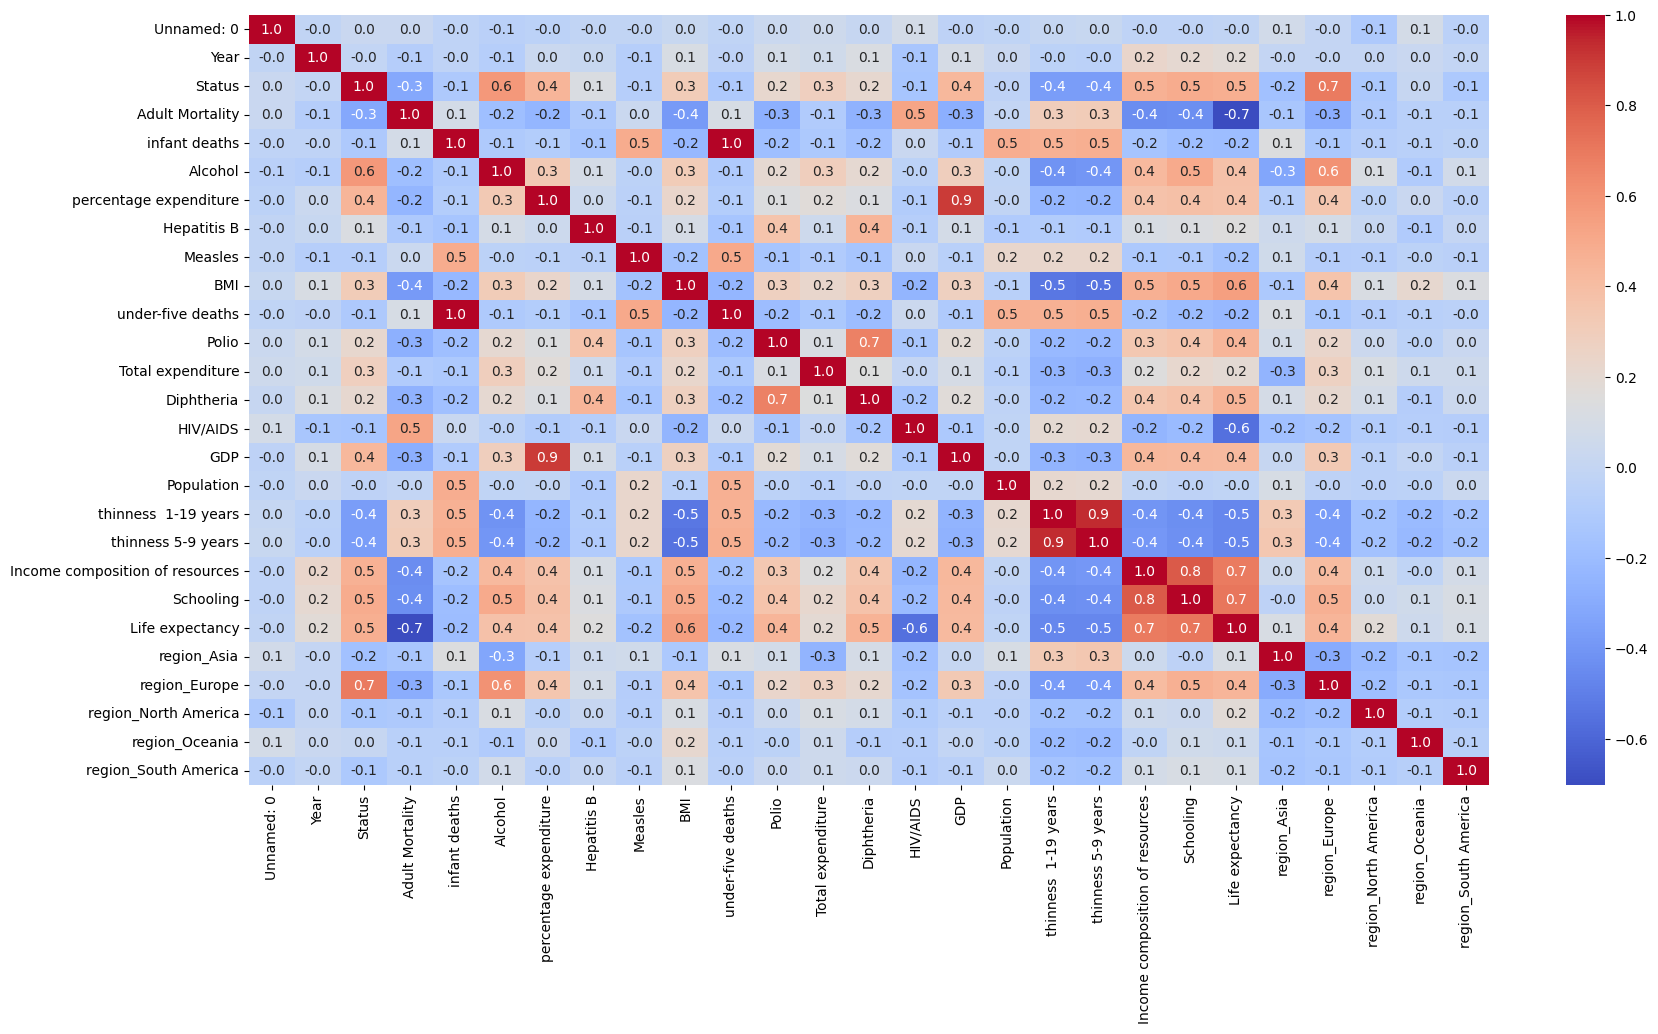

In [16]:
corr = df_encoded.corr()
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

In [17]:
df_encoded.head()

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,8.1,8.0,0.602,11.9,72.3,0,0,0,0,0
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.4,9.3,0.562,11.0,73.0,0,0,0,0,0
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,4.3,4.3,0.733,12.9,74.6,0,0,1,0,0
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,6.4,6.3,0.720,14.7,74.9,0,0,0,0,0
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,6.7,6.1,0.820,13.3,74.8,1,0,0,0,0


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']

vif_data = pd.DataFrame()
vif_data['df_encoded'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                         df_encoded         VIF
0                        Unnamed: 0    4.288577
1                              Year   65.913706
2                            Status    3.049032
3                   Adult Mortality    5.055670
4                     infant deaths  183.820770
5                           Alcohol    5.445114
6            percentage expenditure    6.319193
7                       Hepatitis B   18.797752
8                           Measles    1.450805
9                               BMI    8.932531
10                under-five deaths  183.862173
11                            Polio   26.483493
12                Total expenditure    8.712306
13                       Diphtheria   28.064128
14                         HIV/AIDS    1.736660
15                              GDP    7.245007
16                       Population    1.425184
17             thinness  1-19 years   18.627780
18               thinness 5-9 years   19.064694
19  Income composition of resources   35

,infant deaths,under-five deaths,thinness 1-19 years,thinness 5-9 years
infant deaths,1.000000,0.996285,0.466878,0.474778
under-five deaths,0.996285,1.000000,0.467332,0.475303
thinness 1-19 years,0.466878,0.467332,1.000000,0.936636
thinness 5-9 years,0.474778,0.475303,0.936636,1.000000


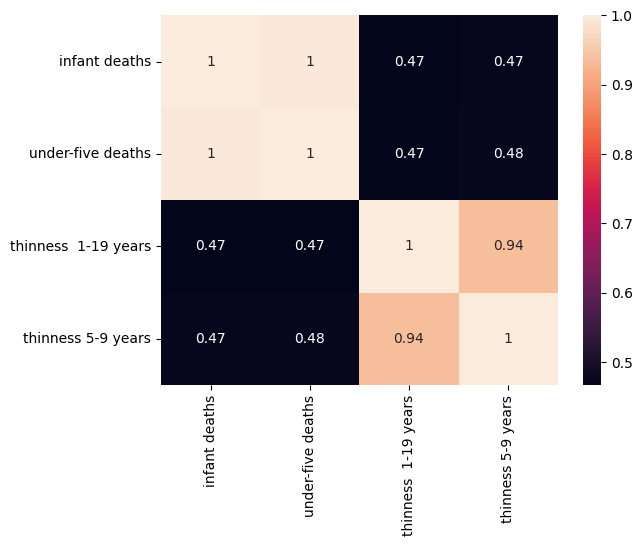

In [19]:
corr_matrix = df_encoded[['infant deaths', 'under-five deaths', 'thinness  1-19 years', 'thinness 5-9 years']].corr()
sns.heatmap(corr_matrix, annot=True)
corr_matrix

In [20]:
df_encoded = df_encoded.drop(columns = ['infant deaths', 'thinness 5-9 years'])

In [21]:
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']

vif_data = pd.DataFrame()
vif_data['df_encoded'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                         df_encoded        VIF
0                        Unnamed: 0   4.260729
1                              Year  63.776978
2                            Status   3.044549
3                   Adult Mortality   5.042214
4                           Alcohol   5.366030
5            percentage expenditure   6.308753
6                       Hepatitis B  18.754464
7                           Measles   1.432508
8                               BMI   8.838037
9                 under-five deaths   2.143361
10                            Polio  26.402373
11                Total expenditure   8.698697
12                       Diphtheria  27.823348
13                         HIV/AIDS   1.733583
14                              GDP   7.213669
15                       Population   1.367495
16             thinness  1-19 years   4.922359
17  Income composition of resources  34.724376
18                        Schooling  52.216935
19                      region_Asia   2.815548
20           

,Hepatitis B,Polio,Diphtheria
Hepatitis B,1.000000,0.365240,0.443234
Polio,0.365240,1.000000,0.671246
Diphtheria,0.443234,0.671246,1.000000


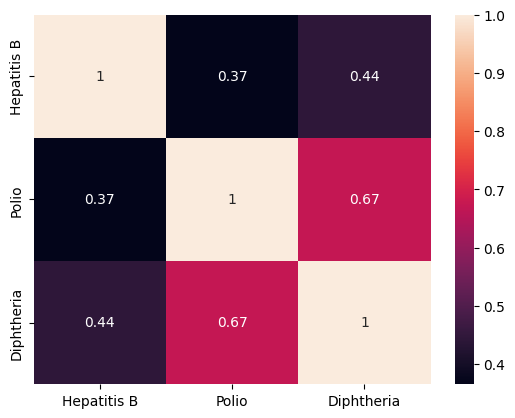

In [22]:
corr_matrix = df_encoded[['Hepatitis B', 'Polio', 'Diphtheria']].corr()
sns.heatmap(corr_matrix, annot=True)
corr_matrix

In [23]:
df_encoded = df_encoded.drop(columns = ['Diphtheria'])

In [24]:
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elastic_net_reg.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_reg.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print(f'ElasticNet MSE: {mse_elastic_net}')

ElasticNet MSE: 17.973505189612347


In [25]:
print(y_train.shape, X_train.shape)

(1880,) (1880, 23)


In [26]:
reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [27]:
y_pred = reg.predict(X_test)


mse = mean_squared_error (y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squered: {r_squared}')

Mean Squared Error: 12.832342865491023
R-Squered: 0.8604540885103069


In [28]:
mse = mean_squared_error(y_test, y_pred)

# Calcula el RMSE
rmse = np.sqrt(mse)

# Imprime el resultado
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 12.832342865491023
Root Mean Squared Error (RMSE): 3.5822259651634236


In [29]:
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']


polynomial_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regressor.fit(X, y)

y_pred2 = polynomial_regressor.predict(X)

In [30]:
mse2 = mean_squared_error(y, y_pred2)
r_squared2 = r2_score(y, y_pred2)

print(f'Mean Squared Error: {mse2}')
print(f'R-Squared: {r_squared2}')

Mean Squared Error: 11.13819270354038
R-Squared: 0.8780191964602732


In [31]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE de Random Forest: {mse_rf}')
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R² de Random Forest: {r2_rf}')

MSE de Random Forest: 3.1215581340425547
R² de Random Forest: 0.9660544703606339


In [32]:

mse = mean_squared_error (y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error for LR: {mse}')
print(f'R-Squered for LR: {r_squared}')



mse2 = mean_squared_error(y, y_pred2)
r_squared2 = r2_score(y, y_pred2)

print(f'Mean Squared Error for PR: {mse2}')
print(f'R-Squared for PR: {r_squared2}')


if mse2 < mse and r_squared2 > r_squared:
    print("\n Polynomial Regression (PR) has a better fit and explains the variance better than Linear Regression (LR).")
else:
    print("\n Linear Regression (LR) performs similarly or better than Polynomial Regression (PR).")

Mean Squared Error for LR: 12.832342865491023
R-Squered for LR: 0.8604540885103069
Mean Squared Error for PR: 11.13819270354038
R-Squared for PR: 0.8780191964602732

 Polynomial Regression (PR) has a better fit and explains the variance better than Linear Regression (LR).


In [33]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

test = pd.read_csv('test.csv')

test = test.drop_duplicates()
test.describe(include=['object'])

test.columns = test.columns.str.strip()

test['Status'] = test['Status'].map({'Developed':1, 'Developing':0}).astype(int)

countries_by_continent = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Bolivia (Plurinational State of)': 'South America', 'South Sudan': 'Africa', 'Finland': 'Europe',
    'Cyprus': 'Asia', 'Uruguay': 'South America', 'Belize': 'North America', 'United Republic of Tanzania': 'Africa',
    'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia', 'Bahrain': 'Asia', 'Ukraine': 'Europe',
    'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania', 'Cuba': 'North America',
    'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa',
    'Spain': 'Europe', 'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America',
    'Sao Tome and Principe': 'Africa', 'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa', 'Antigua and Barbuda': 'North America',
    'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe', 'Nigeria': 'Africa', 'Benin': 'Africa',
    'The former Yugoslav republic of Macedonia': 'Europe', 'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa',
    'Trinidad and Tobago': 'North America', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Lithuania': 'Europe',
    'Sudan': 'Africa', 'Costa Rica': 'North America', 'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia',
    'Sri Lanka': 'Asia', 'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America',
    'Panama': 'North America', 'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia',
    'Haiti': 'North America', 'Iraq': 'Asia', 'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia',
    'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America', 'Maldives': 'Asia', 'Gabon': 'Africa',
    'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa', 'Niue': 'Oceania', 'Latvia': 'Europe',
    'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania',
    'Argentina': 'South America', 'Cambodia': 'Asia', 'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia',
    'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America', 'Thailand': 'Asia', 'Bangladesh': 'Asia',
    'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa', 'Czechia': 'Europe', 'Niger': 'Africa',
    'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia', 'Jordan': 'Asia', 'Russian Federation': 'Asia',
    'Syrian Arab Republic': 'Asia', 'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania', 'Palau': 'Oceania',
    'Monaco': 'Europe', 'Dominica': 'North America'
}


test['region']= test['Country'].map(countries_by_continent)
test = test.drop(columns=['Country'])
test = test.drop(columns = ['infant deaths', 'thinness 5-9 years'])
test = test.drop(columns = ['Diphtheria'])

test_encoded = pd.get_dummies(test, columns=['region'], drop_first=True, dtype= 'int')

test_encoded


,Unnamed: 0,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,2546,2006,0,123.0,0.970,122.652333,83.0,517,48.5,10,...,1762.246170,18914977.0,6.4,0.636,11.4,1,0,0,0,0
1,650,2006,1,113.0,11.830,1555.651986,92.0,1,58.1,0,...,11363.418450,444.0,1.8,0.783,13.9,0,1,0,0,0
2,1740,2007,0,125.0,4.980,678.518894,9.0,0,57.2,0,...,5957.145693,615875.0,2.1,0.762,13.6,0,1,0,0,0
3,177,2014,0,7.0,1.570,367.255674,98.0,46,62.9,0,...,24983.379200,1386542.0,6.1,0.820,14.5,1,0,0,0,0
4,1377,2000,0,428.0,1.510,0.681686,92.0,21002,14.4,121,...,43.979713,3145483.0,9.2,0.448,8.4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,859,2006,0,336.0,0.970,10.602698,94.0,128,14.3,9,...,297.828588,466648.0,9.3,0.405,5.3,0,0,0,0,0
584,1405,2004,0,91.0,0.020,1731.073528,94.0,23,65.9,1,...,26921.827800,1386542.0,3.2,0.791,14.4,1,0,0,0,0
585,962,2015,0,262.0,3.755,0.000000,97.0,71,27.3,5,...,1766.947595,1386542.0,7.3,0.450,8.9,0,0,0,0,0
586,2658,2006,0,188.0,6.350,103.371069,89.0,0,38.4,0,...,1495.963370,133144.0,6.2,0.751,12.3,0,0,1,0,0


In [34]:

y_pred = model_rf.predict(test_encoded)
y_pred

y_pred.shape, test_encoded.shape

((588,), (588, 23))

In [35]:
print(len(range(1, len(y_pred) + 1)))

588


In [72]:
# prediciendo sobre el test set
print(y_pred_rf[0:20])
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'ID': range(1, len(y_pred)+1),
      'Life expectancy': y_pred})
  output.to_csv(name, index=False)
download_output(y_pred, 'submission7.csv')

[63.702 57.937 73.759 72.005 71.149 46.321 74.014 68.367 45.848 73.528
 75.257 82.602 77.295 76.37  82.907 76.668 69.096 67.364 68.436 74.806]
